In [623]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [708]:
df = pd.read_csv('extracted_news_articles.csv', delimiter = ",")
df

,Unnamed: 0,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,...,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id,used_params
0,0,Stories On Russia-Ukraine Conflict,NaN,2022-05-24 07:35:31,full,https://www.outlookindia.com/international/sto...,outlookindia.com,Ukrainian President Volodymyr Zelenskyy says s...,Ukrainian President Volodymyr Zelenskyy says s...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.389711,3a5ca29746d7340cc71232aa2aa9065c,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
1,1,"In Pictures: Destroyed Neighbourhoods, Corpses...",NaN,2022-05-27 13:31:24,full,https://www.outlookindia.com/international/in-...,outlookindia.com,Russia's shelling in eastern Ukraine's Donbas ...,Russia's shelling in eastern Ukraine's Donbas ...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.334095,b705119ecccc4c000f1f530a2f7bb1fd,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
2,2,Russia-Ukraine War: Trails Of Destruction,NaN,2022-05-14 07:29:36,full,https://www.outlookindia.com/international/rus...,outlookindia.com,Russia's invasion on Ukraine has prompted one ...,Russia's invasion on Ukraine has prompted one ...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.292868,d9424976fca3a0115a096ab036372f33,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
3,3,Russia Ukraine war,NaN,2022-05-22 11:01:45,full,https://www.outlookindia.com/international/in-...,outlookindia.com,These photographs from Ukraine showing broken ...,These photographs from Ukraine showing broken ...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.255224,a2f5fbd810694445eb1e04863ec3dbbc,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
4,4,Ukraine War: Trails Of Destruction After Russi...,NaN,2022-05-25 06:37:35,full,https://www.outlookindia.com/international/ukr...,outlookindia.com,Ukrainian President Volodymyr Zelenskyy accuse...,Ukrainian President Volodymyr Zelenskyy accuse...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.234177,4baac70ebecc8ca6c7548c0982b0bfb9,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,9995,The Times view on supporting Ukraine: Winning ...,The Times Leading Articles,2022-05-16 20:00:00,full,https://www.thetimes.co.uk/article/the-times-v...,thetimes.co.uk,Kenzo Tribouillard/Getty ImagesJens Stoltenber...,"Jens Stoltenberg, secretary-general of Nato, b...",thetimes.co.uk,...,news,GB,en,['The Times Leading Articles'],https://www.thetimes.co.uk/imageserver/image/%...,False,NaN,15.260370,c0314407f112c1d4443b107dea229e75,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
10010,9996,Emmanuel Macron warned against trying to appea...,Nicholas Cecil,2022-05-16 09:03:54,full,https://uk.style.yahoo.com/emmanuel-macron-war...,yahoo.com,The French president is believed to have promo...,(AP)\n\nEmmanuel Macron has been warned agains...,yahoo.com,...,news,US,en,['Nicholas Cecil'],https://s.yimg.com/uu/api/res/1.2/9BazX4Cw.CKW...,False,@yahoolifeuk,15.260312,b84daa0774b0b1d3ec49c3435644241a,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
10011,9997,UK inflation hits 40-year high amid Russia's w...,NaN,2022-05-18 06:48:17,full,https://www.wivb.com/news/business/uk-inflatio...,wivb.com,LONDON (AP) — Britain's inflation rate rose to...,"Posted: May 18, 2022 / 02:48 AM EDT Updated: M...",wivb.com,...,news,GB,en,[],https://www.wivb.com/wp-content/uploads/sites/...,False,NaN,15.260263,673a937fc98ffc4115be78150c2d8533,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
10012,9998,UN chief `hopeful' of Ukraine grain deal to he...,News Traffic Weather,2022-05-18 22:07:00,full,https://wtop.co

In [709]:
title = df['title'].astype('str').head(100)

country = df['country'].astype('str').head(100)

summary = df['summary'].astype('str').head(100)
summary

0     Ukrainian President Volodymyr Zelenskyy says s...
1     Russia's shelling in eastern Ukraine's Donbas ...
2     Russia's invasion on Ukraine has prompted one ...
3     These photographs from Ukraine showing broken ...
4     Ukrainian President Volodymyr Zelenskyy accuse...
                            ...                        
95    Amid the ruthless war in Eastern Europe, Ukrai...
96    President Biden Friday said that Russian Presi...
97    This is a carousel. Use Next and Previous butt...
98    ANI24 May 2022, 20:55 GMT+10 New Delhi [India]...
99    US says Ukraine ultimately defines the end of ...
Name: summary, Length: 100, dtype: object

In [710]:
title

0                    Stories On Russia-Ukraine Conflict
1     In Pictures: Destroyed Neighbourhoods, Corpses...
2             Russia-Ukraine War: Trails Of Destruction
3                                    Russia Ukraine war
4     Ukraine War: Trails Of Destruction After Russi...
                            ...                        
95    Goal to supply as many weapons to Ukraine; att...
96    Biden says Putin 'NATOized' Europe with war in...
97    After 3 months, Russia still bogged down in Uk...
98    Amid Russia-Ukraine war, Eastern Army Commande...
99    200 bodies found in bombed Mariupol building; ...
Name: title, Length: 100, dtype: object

In [711]:
synopses_clean_wiki = []
for text in summary:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_wiki.append(text)

synopses_wiki = synopses_clean_wiki

In [712]:
title_clean_wiki = []
for text in title:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    title_clean_wiki.append(text)

title_wiki = title_clean_wiki

In [713]:
title = []

for i in range(len(title_wiki)):
    item = title_wiki[i]
    title.append(item)

In [677]:
summary = []

for i in range(len(synopses_wiki)):
    item = synopses_wiki[i]
    summary.append(item)

In [678]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(country)):
    ranks.append(i)

In [679]:
stopwords = nltk.corpus.stopwords.words('english')

In [680]:
print (stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [681]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [682]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [683]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in summary:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [684]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 9310 items in vocab_frame


In [685]:
print(vocab_frame.head())
print
print
print
print

               words
ukrainian  ukrainian
presid     president
volodymyr  volodymyr
zelenskyy  zelenskyy
say             says


<function print>

In [686]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

#%%time 

tfidf_matrix = tfidf_vectorizer.fit_transform(summary) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

(100, 19)


/Users/ysojdehei/opt/anaconda3/envs/GRADSCHOOL/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


In [687]:
tfidf_vectorizer.get_feature_names_out()

array(["'s", 'amid', 'citi', 'countri', 'eastern', 'end', 'fight', 'forc',
       'militari', 'month', 'presid', 'russia', "russia 's", 'russian',
       'said', 'state', 'ukrainian', 'war ukrain', 'world'], dtype=object)

In [688]:
terms = tfidf_vectorizer.get_feature_names()

/Users/ysojdehei/opt/anaconda3/envs/GRADSCHOOL/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [689]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [690]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 183 ms, sys: 64.8 ms, total: 248 ms
Wall time: 53.7 ms


In [691]:
#from sklearn.externals import joblib
import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()


In [692]:
output = {'title': title, 'Summary': summary, 'Cluster': clusters, 'ranks': ranks}

frame = pd.DataFrame(output, index = [clusters] , columns = ['title', 'Summary', 'Cluster', 'ranks'])

In [693]:
frame['Cluster'].value_counts()

4    32
3    20
0    17
2    16
1    15
Name: Cluster, dtype: int64

In [694]:
grouped = frame['ranks'].groupby(frame['Cluster']) #groupby cluster for aggregation purposes

grouped.mean() #average rank (1 to 100) per cluster

Cluster
0    43.470588
1    69.400000
2    56.625000
3    50.250000
4    39.343750
Name: ranks, dtype: float64

In [695]:
frame = frame.reset_index(drop=True)
frame

,title,Summary,Cluster,ranks
0,Stories On Russia-Ukraine Conflict,Ukrainian President Volodymyr Zelenskyy says s...,4,0
1,"In Pictures: Destroyed Neighbourhoods, Corpses...",Russia's shelling in eastern Ukraine's Donbas ...,4,1
2,Russia-Ukraine War: Trails Of Destruction,Russia's invasion on Ukraine has prompted one ...,4,2
3,Russia Ukraine war,These photographs from Ukraine showing broken ...,4,3
4,Ukraine War: Trails Of Destruction After Russi...,Ukrainian President Volodymyr Zelenskyy accuse...,4,4
...,...,...,...,...
95,Goal to supply as many weapons to Ukraine; att...,"Amid the ruthless war in Eastern Europe, Ukrai...",0,95
96,Biden says Putin 'NATOized' Europe with war in...,President Biden Friday said that Russian Presi...,3,96
97,"After 3 months, Russia still bogged down in Uk...",This is a carousel. Use Next and Previous butt...,1,97
98,"Amid Russia-Ukraine war, Eastern Army Commande...","ANI24 May 2022, 20:55 GMT+10 New Delhi [India]...",4,98


In [696]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title']:
        print(title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'stated', b'russia', b"'s", b'said', b'ukrainian', b'world',

Cluster 0 titles:Stories On Russia-Ukraine Conflict

Cluster 1 words: b'amid', b'country', b'russian', b'end', b'months', b'fighting',

Cluster 1 titles:In Pictures: Destroyed Neighbourhoods, Corpses In Streets, The Toll Of Russian Invasion

Cluster 2 words: b'said', b'world', b'ukrainian', b'russia', b'president', b'russian',

Cluster 2 titles:Russia-Ukraine War: Trails Of Destruction

Cluster 3 words: b'military', b"'s", b'president', b'country', b'russian', b'war',

Cluster 3 titles:Russia Ukraine war

Cluster 4 words: b'russia', b'russian', b"'s", b'eastern', b'forces', b'russia',

Cluster 4 titles:Ukraine War: Trails Of Destruction After Russian Invasion



In [697]:
frame['Rank'] = frame['ranks'] + 1
frame['Title'] = frame['title']

In [698]:
print(frame[['Rank', 'Title']].loc[frame['Cluster'] == 1].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Rank</th>
      <th>Title</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>35</td>
      <td>After 3 months, Russia still bogged down in Ukraine war</td>
    </tr>
    <tr>
      <td>44</td>
      <td>After 3 months, Russia still bogged down in Ukraine war</td>
    </tr>
    <tr>
      <td>55</td>
      <td>After 3 months, Russia still bogged down in Ukraine war</td>
    </tr>
    <tr>
      <td>56</td>
      <td>200 bodies found in bombed Mariupol building; Ukraine war is 'not the United States' fight': Live updates</td>
    </tr>
    <tr>
      <td>60</td>
      <td>After 3 months, Russia still bogged down in Ukraine war</td>
    </tr>
    <tr>
      <td>64</td>
      <td>After 3 months, Russia still bogged down in Ukraine war</td>
    </tr>
    <tr>
      <td>69</td>
      <td>Indian eatery in Kyiv providing free meals to Ukrainians; 'Will continue till war ends'</td>
    </tr>
    <tr

In [699]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [700]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [701]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'ukrainian, russia, world', 
                 1: 'months, country, fighting', 
                 2: 'world, president, russion', 
                 3: 'military, country, war', 
                 4: 'eastern, forces, russia'}

In [702]:
%matplotlib inline

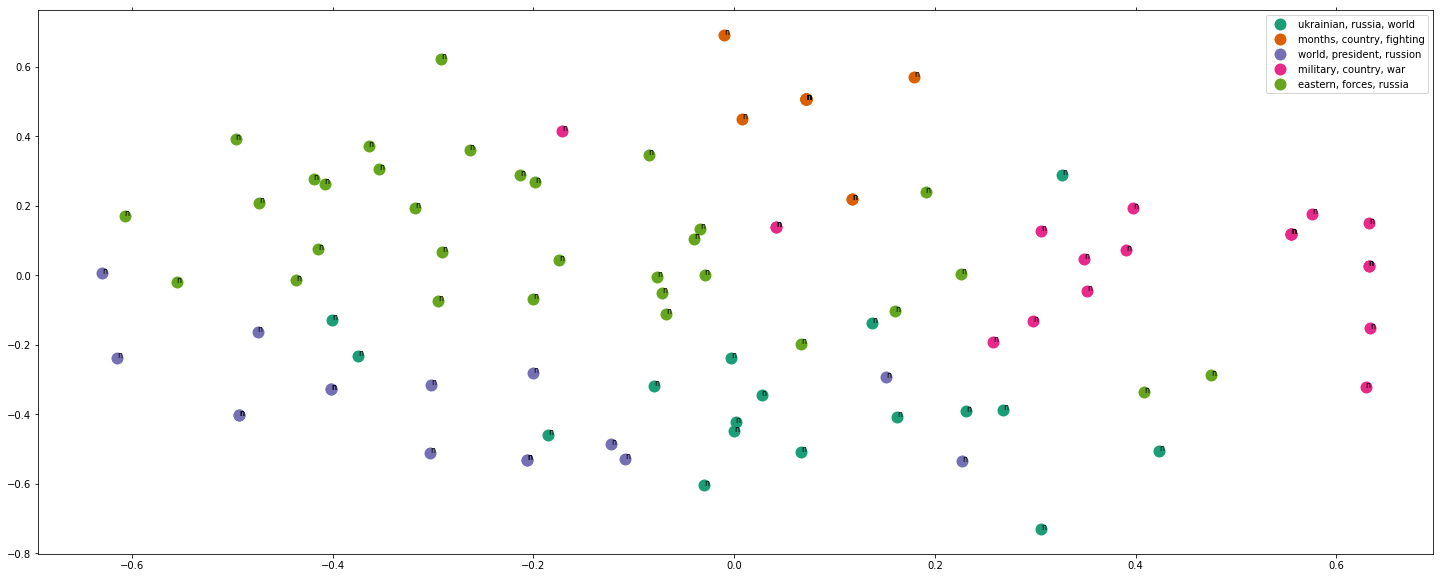

In [703]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=title)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(25, 10)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [704]:
plt.close()

In [705]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [720]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=title)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

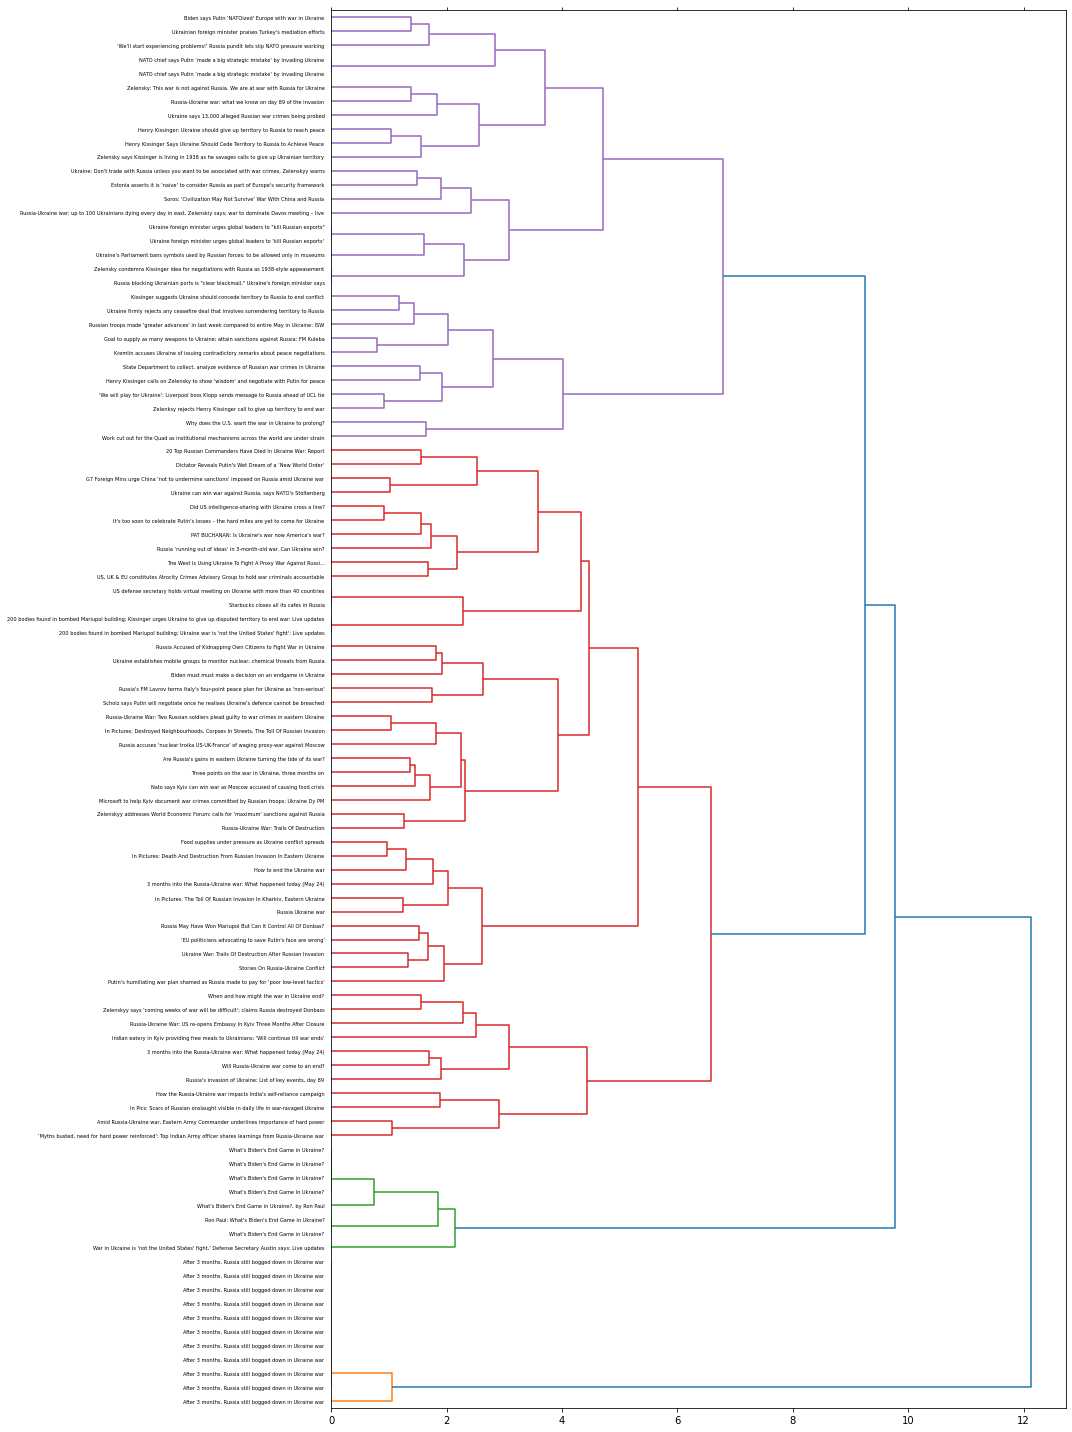

In [722]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=title);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=900)

In [719]:
df

,Unnamed: 0,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,...,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id,used_params
0,0,Stories On Russia-Ukraine Conflict,NaN,2022-05-24 07:35:31,full,https://www.outlookindia.com/international/sto...,outlookindia.com,Ukrainian President Volodymyr Zelenskyy says s...,Ukrainian President Volodymyr Zelenskyy says s...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.389711,3a5ca29746d7340cc71232aa2aa9065c,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
1,1,"In Pictures: Destroyed Neighbourhoods, Corpses...",NaN,2022-05-27 13:31:24,full,https://www.outlookindia.com/international/in-...,outlookindia.com,Russia's shelling in eastern Ukraine's Donbas ...,Russia's shelling in eastern Ukraine's Donbas ...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.334095,b705119ecccc4c000f1f530a2f7bb1fd,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
2,2,Russia-Ukraine War: Trails Of Destruction,NaN,2022-05-14 07:29:36,full,https://www.outlookindia.com/international/rus...,outlookindia.com,Russia's invasion on Ukraine has prompted one ...,Russia's invasion on Ukraine has prompted one ...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.292868,d9424976fca3a0115a096ab036372f33,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
3,3,Russia Ukraine war,NaN,2022-05-22 11:01:45,full,https://www.outlookindia.com/international/in-...,outlookindia.com,These photographs from Ukraine showing broken ...,These photographs from Ukraine showing broken ...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.255224,a2f5fbd810694445eb1e04863ec3dbbc,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
4,4,Ukraine War: Trails Of Destruction After Russi...,NaN,2022-05-25 06:37:35,full,https://www.outlookindia.com/international/ukr...,outlookindia.com,Ukrainian President Volodymyr Zelenskyy accuse...,Ukrainian President Volodymyr Zelenskyy accuse...,outlookindia.com,...,news,IN,en,[],https://imgnew.outlookindia.com/uploadimage/li...,False,@outlookindia,18.234177,4baac70ebecc8ca6c7548c0982b0bfb9,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,9995,The Times view on supporting Ukraine: Winning ...,The Times Leading Articles,2022-05-16 20:00:00,full,https://www.thetimes.co.uk/article/the-times-v...,thetimes.co.uk,Kenzo Tribouillard/Getty ImagesJens Stoltenber...,"Jens Stoltenberg, secretary-general of Nato, b...",thetimes.co.uk,...,news,GB,en,['The Times Leading Articles'],https://www.thetimes.co.uk/imageserver/image/%...,False,NaN,15.260370,c0314407f112c1d4443b107dea229e75,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
10010,9996,Emmanuel Macron warned against trying to appea...,Nicholas Cecil,2022-05-16 09:03:54,full,https://uk.style.yahoo.com/emmanuel-macron-war...,yahoo.com,The French president is believed to have promo...,(AP)\n\nEmmanuel Macron has been warned agains...,yahoo.com,...,news,US,en,['Nicholas Cecil'],https://s.yimg.com/uu/api/res/1.2/9BazX4Cw.CKW...,False,@yahoolifeuk,15.260312,b84daa0774b0b1d3ec49c3435644241a,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
10011,9997,UK inflation hits 40-year high amid Russia's w...,NaN,2022-05-18 06:48:17,full,https://www.wivb.com/news/business/uk-inflatio...,wivb.com,LONDON (AP) — Britain's inflation rate rose to...,"Posted: May 18, 2022 / 02:48 AM EDT Updated: M...",wivb.com,...,news,GB,en,[],https://www.wivb.com/wp-content/uploads/sites/...,False,NaN,15.260263,673a937fc98ffc4115be78150c2d8533,"{'q': 'War OR Ukraine OR Russia', 'lang': 'en'..."
10012,9998,UN chief `hopeful' of Ukraine grain deal to he...,News Traffic Weather,2022-05-18 22:07:00,full,https://wtop.co